# Problem Statement


---

As a data analyst for Telecom, I want to leverage the customer and device information I have, along with the revenue data, to gain insights that can help improve the business operations and increase sales revenue growth. 

Specifically, I want to understand the characteristics of our high-value customers, identify patterns and trends in their mobile and IoT device usage, and analyze the relationship between device usage and revenue. By answering these questions, we can better target our marketing and sales efforts, optimize our device offerings, and increase customer satisfaction.

To achieve these goals, I plan to perform the following analyses:

***Customer segmentation analysis:*** Using the customer information provided, I will segment the customers based on factors such as year of birth, gender, mobile service status, and value segment. This will help me to understand the characteristics of our high-value customers and tailor our marketing and sales efforts accordingly.

***Device usage analysis:*** I will analyze the device information provided to gain insights into the most popular brands, models, and operating systems used by our customers. This analysis will help me optimize our device offerings and ensure that we are meeting our customer preferences.

***IoT device usage analysis:*** I will use the IoT device information provided to identify patterns and trends in device usage, such as the most common device our customers purchase. This will help in better understanding customer behavior and improve our device offerings and services.

***Revenue analysis:*** I will then analyze the revenue data provided to identify patterns and trends in revenue generation. This will help me understand the relationship between device usage and revenue, and identify opportunities to increase revenue growth.

By performing these analyses, I can gain a deeper understanding of our customers, their behavior, and their preferences, and use this knowledge to optimize our business operations and increase revenue growth.


<span style="text-decoration: underline"> **The above analysis will include the following:** </span> 

#### Customer segmentation analysis:
a. Data cleaning and preprocessing: This step will involve cleaning the data, handling missing values and outliers, and transforming variables as necessary.

b. Feature selection and engineering: In this step, I will select the relevant variables for segmentation and engineer new features if needed. For example, I will create new variable that may represents the customer's age group based on the year of birth.

c. Clustering or classification: Using the selected features, I will apply clustering or classification algorithms to group customers into segments based on their characteristics.

d. Evaluation: I will then evaluate the quality of the segments using metrics such as silhouette score or accuracy.

#### Device usage analysis:
a. Data cleaning and preprocessing: This step will involve cleaning the data, handling missing values and outliers, and transforming variables as necessary.

b. Data exploration: In this step, I will visualize the device data using charts and graphs to identify patterns and trends in device usage.

c. Statistical analysis: We will apply statistical methods such as regression or hypothesis testing to identify factors that affect device usage, such as gender or mobile type.

d. Visualization: I will later create charts and graphs to present the results of the analysis in a meaningful way.

#### IoT device usage analysis:
a. Data cleaning and preprocessing: This step involves cleaning the data, handling missing values and outliers, and transforming variables as necessary.

b. Data exploration: In this step, I will visualize the IoT device data using charts and graphs to identify patterns and trends in device usage, such as the most common locations and times of usage.

c. Time series analysis: I will apply time series analysis (conditional) if the dataset contain the necessary information to help me apply the techniques to identify patterns and trends over time.

d. Visualization: I will create charts and graphs to present the results of our analysis in a meaningful way.

#### Revenue analysis:
a. Data cleaning and preprocessing: This step involves cleaning the data, handling missing values and outliers, and transforming variables as necessary.

b. Data exploration: In this step, I will visualize the revenue data using charts and graphs to identify patterns and trends in revenue generation.

c. Statistical analysis: I will apply statistical methods such as regression or hypothesis testing to identify factors that affect revenue generation, such as device usage or customer segment.

d. Visualization: I will create charts and graphs to present the results of our analysis in a meaningful way.



# Dataset Link

https://www.kaggle.com/datasets/krishnacheedella/telecom-iot-crm-dataset?select=rev1.csv



### Importing the needed libraries for the project


In [1]:
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.ticker as mtick
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

#setting the default figsize for all charts
mpl.rcParams['figure.figsize'] = (12, 5)


%matplotlib inline

# Set Standardized colors
colors = ['darkviolet', 'dodgerblue', 'lightseagreen','teal','deepskyblue','cadetblue','olive','lightcoral']
cmap = plt.get_cmap('rainbow') #This will be used for column charts


### Loading the csv datasets for the projects

In [2]:
df_crm = pd.read_csv('/Users/erryk/Downloads/archive (2)/crm1.csv')
df_dev = pd.read_csv('/Users/erryk/Downloads/archive (2)/device1.csv')
df_rev = pd.read_csv('/Users/erryk/Downloads/archive (2)/rev1.csv')

### Checking the contents of the dataframes

In [3]:
df_crm.head(3)

,msisdn,gender,year_of_birth,system_status,mobile_type,value_segment
0,aeef4233d9ad34e41f7ecf48d64646f8,MALE,1985.0,ACTIVE,Prepaid,Tier_3
1,2397d009e705bc8a2654cbb3f480cc59,MALE,1958.0,ACTIVE,Prepaid,Tier_3
2,6f05d738919f9283322bae17dc366bf5,MALE,1976.0,ACTIVE,Prepaid,Tier_3


In [4]:
df_dev.head(3)

,msisdn,imei_tac,brand_name,model_name,os_name,os_vendor
0,c0e80ecc67484f293db0cf723146c9d6,7ce90a5469d6a07dc8c770956cc29482,SAMSUNG,GALAXY J1 ACE (SM-J111F),Android,Google
1,2bce0cd398cbc9b2478ecaf1ef62b2c1,110f73736e1e1fe0ef5cb8a581bc0ec2,WALTON,OLVIO L22,NaN,NaN
2,d7b8b49fafb853a3aef0c20d49bca845,ddf90b7c597d7714637ecde342a8c609,LG,W1500,LG OS,LG


In [5]:
df_rev.head(3)

,msisdn,week_number,revenue_usd
0,66e94d24d8e0d5776a8a6b694782eff0,26,20.265621
1,66e94d24d8e0d5776a8a6b694782eff0,34,5.361164
2,66e94d24d8e0d5776a8a6b694782eff0,31,18.181347


### Data cleaning and preprocessing: 

In [6]:
# Checking for missing data in all the dataframes

df_crm.isnull().any()

msisdn           False
gender            True
year_of_birth     True
system_status    False
mobile_type      False
value_segment    False
dtype: bool

In [7]:
#count the number of records in each column

df_crm.count()

msisdn           13627493
gender           10947689
year_of_birth    13624553
system_status    13627493
mobile_type      13627493
value_segment    13627493
dtype: int64

In [8]:
#removing blank rows based on the gender and the year of birth column

df_crm.dropna(subset=['gender', 'year_of_birth'], inplace = True)

In [9]:
#Checking the output again to ensure same number of records

df_crm.count()

msisdn           10945567
gender           10945567
year_of_birth    10945567
system_status    10945567
mobile_type      10945567
value_segment    10945567
dtype: int64

In [10]:
#Let's verify our df once again

df_crm.head(5)

,msisdn,gender,year_of_birth,system_status,mobile_type,value_segment
0,aeef4233d9ad34e41f7ecf48d64646f8,MALE,1985.0,ACTIVE,Prepaid,Tier_3
1,2397d009e705bc8a2654cbb3f480cc59,MALE,1958.0,ACTIVE,Prepaid,Tier_3
2,6f05d738919f9283322bae17dc366bf5,MALE,1976.0,ACTIVE,Prepaid,Tier_3
3,45352d9d126f86f40c7eee79a82c833c,MALE,1996.0,ACTIVE,Prepaid,Tier_3
4,959b00a279e2785cfa81728338c324f7,FEMALE,1960.0,ACTIVE,Prepaid,Tier_3


In [11]:
#One of the columns of interest is the gender column, let's Check the unique values of that column

df_crm['gender'].unique()

array(['MALE', 'FEMALE', 'Male', 'Female', 'Not Available', 'male', 'M',
       'Female.', 'F', 'Female3', '.', 'U', 'female', '3', 'P', 'Other',
       'Female]', ']', '+', 'FE', '16/10', 'Female`', 'FemaleF', 'B', '`',
       '1', 'Female..', 'Femal]e', '!', 'Q', 'W', 'qqqq', '0.0-', 'Male.',
       'FEMELE', '~', 'MaFEle', '20/1/1966', '``', 'mALE', 'D', '\\\\',
       'MaleF', 'DF', 'S', 'A', 'Mal', '0', 'O', 'FemaleH', '```',
       'TEACHER', 'A/N', 'MFEale', '11', 'MA', 'q', 'MalFEe', 'H',
       'Female\\\\', 'FAMALE', '333', '21', 'HOWZ WIFE', 'PR',
       '25/5/1978', 'Femal', 'FEMAL', 'MY', '6', '05/01/1958', 'swdwdxw',
       'K', 'Male`', '22/8/1980', 'J', 'FEMEL'], dtype=object)

In [12]:
# Apply some data cleaning technique here by mapping the somewhat valid genders

df_crm['gender'] = df_crm['gender'].replace(['MALE', '1','Male', 'male', 'M', 'Mal', 'Male.', 'MaFEle', 'mALE', 'MaleF', 'MA', 'MalFEe', 'K', 'Male`'], 'Male')
df_crm['gender'] = df_crm['gender'].replace(['FEMALE', 'Female','MFEale','FEMEL','FE','Female3', 'female', 'F', 'Female.', 'Female]', 'Female`', 'FemaleF', 'Femal]e', 'Female..', 'Female\\\\', 'FAMALE', 'Femal', 'FEMAL', 'FemaleH', 'FEMELE', 'HOWZ WIFE'], 'Female')

In [13]:
# I will verify the remaining values and exclude the rows with unindentified characters

df_crm['gender'].unique()

array(['Male', 'Female', 'Not Available', '.', 'U', '3', 'P', 'Other',
       ']', '+', '16/10', 'B', '`', '!', 'Q', 'W', 'qqqq', '0.0-', '~',
       '20/1/1966', '``', 'D', '\\\\', 'DF', 'S', 'A', '0', 'O', '```',
       'TEACHER', 'A/N', '11', 'q', 'H', '333', '21', 'PR', '25/5/1978',
       'MY', '6', '05/01/1958', 'swdwdxw', '22/8/1980', 'J'], dtype=object)

In [14]:
# Define the correct genders to retain and exclude the rows with unknown characters

valid_gender = ['Male', 'Female']

#exclude all others
df_crm = df_crm[df_crm['gender'].isin(valid_gender)]

In [15]:
# get current year

min_year = 1958.0
max_year = 2013.0

# filter DataFrame to exclude future years of birth less than 10 years

df_crm = df_crm.loc[(df_crm['year_of_birth'] >= min_year) & (df_crm['year_of_birth'] <= max_year)]


In [16]:
df_crm.count()

msisdn           10230212
gender           10230212
year_of_birth    10230212
system_status    10230212
mobile_type      10230212
value_segment    10230212
dtype: int64

In [17]:
#Check the unique values again

df_crm['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [18]:
#count the unique total males and females

gender_count = df_crm.groupby('gender')['msisdn'].nunique()
gender_count

gender
Female    1315073
Male      8637117
Name: msisdn, dtype: int64

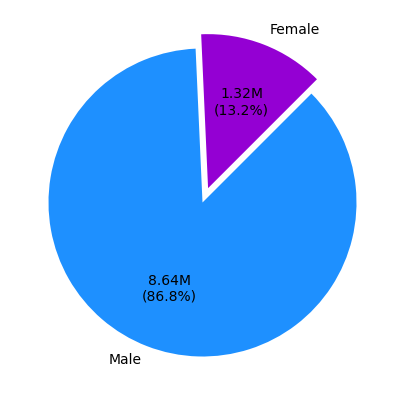

In [19]:
# Plot the above result using a pie chart and add percentages and some formats

explode = [0.1, 0]

def actual_and_percentage(val):
    actual_val = round(val * gender_count.sum()/1e8,2)
    percentage_val = val
    return '{:.2f}M\n({:.1f}%)'.format(actual_val, percentage_val)

plt.pie(gender_count, labels=gender_count.index, autopct=actual_and_percentage, colors=colors,
        explode=explode, startangle=45)

plt.show()


---

### Insight

Our company has a significantly higher number of male customers than female customers. The number of male customers (~8.64M) is approximately six times higher than that of female customers of 1.32M representing 13% of the total customers.

The difference in customer count between males and females may be due to factors such as our marketing strategies, the services we offer, and/or the pricing of our products/services.

Understanding the customer base demographics can also help us to tailor our products and services to meet the needs of our customers. For instance, we may need to offer products and services that appeal to the specific preferences and interests of female customers, which may differ from those of male customers.

### Recommendation

1. Get our research team to conduct a market research to better understand the demographics and preferences of our customer base.

2. We should develop s targeted marketing campaigns with the insights gained from market research. This targeted marketing campaigns should appeal to both our male and female customers. The campaigns could focus on the specific preferences and interests of each demographic to increase our services appeal to a broader customer base.

3. Offer gender-specific services: To appeal to female customers, we can consider offering gender-specific services that address their unique needs and preferences. For instance, we could offer family plans that cater to women's and children's communication needs, or offer special promotions on devices that appeal to women.

4. Review pricing strategy: We could review our pricing strategy to ensure that it is not a deterrent for potential female customers. This could involve offering discounted rates for female customers, or providing packages that are tailored to their needs.

5. Evaluate customer service: We should also ensure that our customer service is gender-sensitive and provides equal treatment to both male and female customers. We can also consider recruiting more female staff to ensure gender balance and provide a more welcoming environment for female customers.

---

In [20]:
# I will apply a similar technique to the system status column

status_count = df_crm.groupby('system_status')['msisdn'].nunique().sort_values(ascending = False)
status_count


system_status
ACTIVE     9569125
SUSPEND     228055
IDLE             9
Name: msisdn, dtype: int64

In [21]:
# Since the Idle and Deactivate statuses are insignificant, i will drop them from the chart

status_count = status_count.head(2)
status_count

system_status
ACTIVE     9569125
SUSPEND     228055
Name: msisdn, dtype: int64

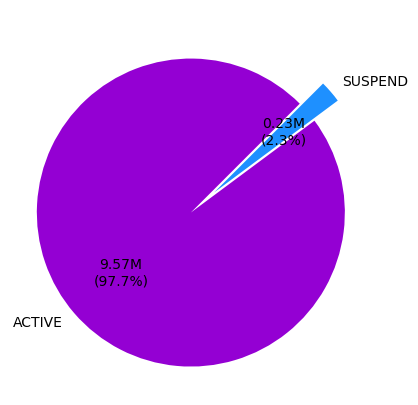

In [22]:
# I will create a bar chart for the result instead

explode = [0.1, 0.1]

#define text properties for the data labels

textprops = {'fontsize':10, 'color': 'black'}

# custom function to format the values

def actual_and_percentage(val):
    actual_val = round(val * status_count.sum()/1e8,2)
    percentage_val = val
    return '{:.2f}M\n({:.1f}%)'.format(actual_val, percentage_val)

plt.pie(status_count, labels=status_count.index, autopct=actual_and_percentage, colors=colors,
        explode=explode, startangle=45, textprops = textprops)

plt.show()

---

### Insight

The majority of our customers are active, with a count of ~9.57M representing ~98%, indicating that we are providing services that meet the needs of our customers.

The number of customers on suspension is relatively low, with a count of ~228K, indicating that we have an effective policies in place to handle customer complaints and resolve issues that could lead to customer churn. We may want to investigate the reasons why customers are put on suspension and identify any patterns or common issues that could be addressed to reduce the number of suspended customers.


### Recommendation

1. Identify the reasons for customer suspensions: We should investigate the reasons why customers are put on suspension and identify any patterns or common issues that could be addressed. This could involve analyzing customer complaints and feedback to identify recurring issues that need to be addressed to prevent customer suspensions.

2. Improve customer service: We should focus on improving our customer service to ensure that customers are satisfied with the services and are less likely to be suspended. This could involve training customer service representatives to provide better support, improving response times to customer queries, and providing additional channels for customers to raise complaints and issues.

3. Offer incentives for active customers: We can consider offering incentives to active customers to encourage them to continue using our services. This could involve loyalty programs that reward customers for their continued patronage, discounts on services or products, or other rewards that incentivize customers to remain active.

4. Monitor customer suspensions: We should closely monitor customer suspensions and track trends over time. This will help us to identify any changes in customer behavior and respond proactively to prevent customer churn.

---

In [23]:
# Applied same technique for the mobile type

mobtype_count = df_crm.groupby('mobile_type')['msisdn'].nunique()
mobtype_count

mobile_type
Postpaid     117499
Prepaid     9454913
Name: msisdn, dtype: int64

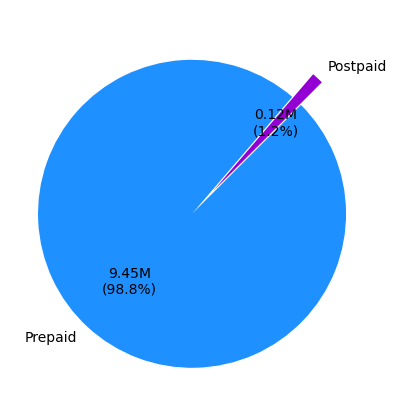

In [24]:
# Plot the above result using a pie chart and add percentages
explode = [0.1, 0.1]
textprops = {'fontsize':10, 'color': 'black'}

def a_and_p(val):
    actual_val = round(val * mobtype_count.sum()/1e8,2)
    percentage_val = val
    return '{:.2f}M\n({:.1f}%)'.format(actual_val, percentage_val)

plt.pie(mobtype_count, labels = mobtype_count.index, explode = explode, colors = colors, startangle = 45, \
        autopct =a_and_p , textprops = textprops)


plt.show()

---

### Insight

Prepaid customers constitute the vast majority of the customer base, with a count of ~9.45M representing ~99% of the total customers, while postpaid customers are relatively few, with a count of 117K representing ~1%.

Prepaid customers tend to be more price-sensitive and may be more likely to switch service providers in search of better rates, while postpaid customers tend to be more loyal and less likely to switch service providers.

We may need to focus on strategies that cater to the needs of both prepaid and postpaid customers, such as offering differentiated pricing plans and services that cater to the unique needs of each customer segment.

### Recommendation

We should focus on developing a targeted marketing strategies, improving customer retention, enhancing pricing flexibility, and monitoring customer satisfaction to better cater to the needs of both prepaid and postpaid customers and grow our customer base.

---

In [25]:
# Group the mobile type by Gender

mob_type_gen = df_crm.groupby(['mobile_type','gender'])['msisdn'].nunique().unstack(fill_value=0).sort_values(by='Male', ascending = False)
mobile_type_gen = mob_type_gen[['Male','Female']]
mobile_type_gen

gender,Male,Female
mobile_type,,
Prepaid,8523704,1311404
Postpaid,114564,3705


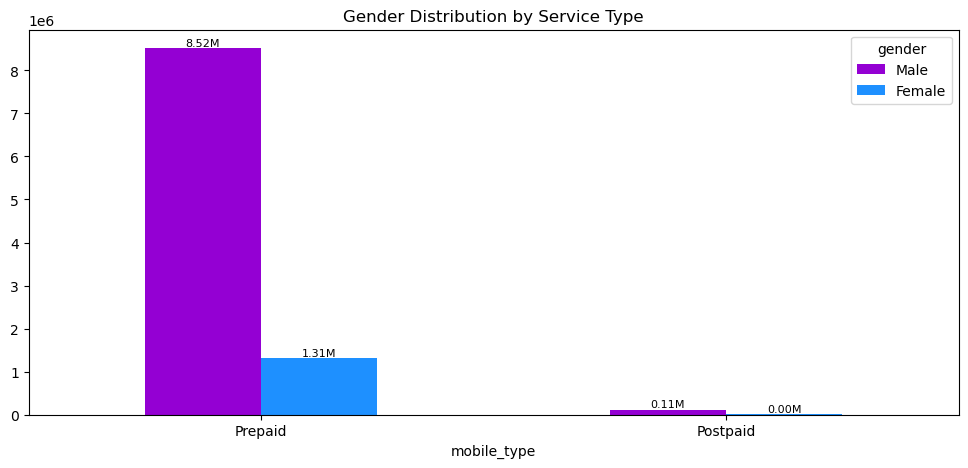

In [26]:
# This will create a bar chart with the above analysis

ax = mobile_type_gen.plot(kind='bar', color = colors)

# Add data labels
for p in ax.containers:
    ax.bar_label(p, label_type='edge', labels=[f'{x/1000000:,.2f}M' for x in p.datavalues], rotation = 0, fontsize=8)

# set the chart title and labels
plt.title('Gender Distribution by Service Type')
plt.xticks(rotation = 0)
# show the plot
plt.show()


---

### Insight

The majority of customers use prepaid mobile services, with ~8.52M being Males and ~1.31M being Females, while only a small proportion of customers use postpaid services, with ~115K being Males and ~3K being Females.

There is a gender disparity between prepaid and postpaid users, with a higher proportion of males using prepaid services compared to females, while a higher proportion of males use postpaid services compared to females.


### Recommendation

The Postpaid customers are relatively low and there should a be a promotion to target some of the Prepaid customers to opt in for our Postpaid service. We should also focus on developing targeted marketing strategies, enhancing customer service, offering flexible pricing plans, and addressing gender disparities to better cater to the needs of our customers and grow in numbers.

---

In [27]:
# Apply similar technique for the value segment - this has only one description so no need for further analysis

vsegment_count = df_crm.groupby('value_segment')['msisdn'].nunique()
vsegment_count

value_segment
Tier_3    9571215
Name: msisdn, dtype: int64

In [28]:
# Here I created a function to assign generations to the customers based on the year of birth
# This will help us to target specific customers for specific service
# Create function to determine generation based on the year of birth

def determine_generation(year):
    if year <= 1945:
        return 'Silent Generation'
    elif year >= 1946 and year <= 1964:
        return 'Baby Boomers'
    elif year >= 1965 and year <= 1980:
        return 'Gen X'
    elif year >= 1981 and year <= 1995:
        return 'Millennials'    
    elif year >= 1996 and year <= 2015:
        return 'Gen Z'  
    else:
        return 'Generation Alpha'

# Apply function to create new column
df_crm['generation'] = df_crm['year_of_birth'].apply(lambda x: determine_generation(x))


In [29]:
# Check the above on the df
df_crm.head(10)

,msisdn,gender,year_of_birth,system_status,mobile_type,value_segment,generation
0,aeef4233d9ad34e41f7ecf48d64646f8,Male,1985.0,ACTIVE,Prepaid,Tier_3,Millennials
1,2397d009e705bc8a2654cbb3f480cc59,Male,1958.0,ACTIVE,Prepaid,Tier_3,Baby Boomers
2,6f05d738919f9283322bae17dc366bf5,Male,1976.0,ACTIVE,Prepaid,Tier_3,Gen X
3,45352d9d126f86f40c7eee79a82c833c,Male,1996.0,ACTIVE,Prepaid,Tier_3,Gen Z
4,959b00a279e2785cfa81728338c324f7,Female,1960.0,ACTIVE,Prepaid,Tier_3,Baby Boomers
6,b74761390712bde1309ac38b46d59df8,Male,1994.0,ACTIVE,Prepaid,Tier_3,Millennials
7,1311649d0d7ffeb132cfaf6a0233483e,Male,1992.0,ACTIVE,Prepaid,Tier_3,Millennials
8,8e6e340aa4b1a449305da80327f4e6ff,Male,1963.0,ACTIVE,Prepaid,Tier_3,Baby Boomers
9,fc91bb6f212bf1aca7f30acb5a8f1d16,Male,1978.0,ACTIVE,Postpaid,Tier_3,Gen X
12,e78cfd27d4cfd96c79884afdf309f497,Male,1981.0,ACTIVE,Prepaid,Tier_3,Millennials


In [30]:
# Apply same technique to count the customers

gen_count = df_crm.groupby('generation')['msisdn'].nunique().sort_values(ascending = False)
gen_count

generation
Millennials     5359879
Gen X           3400902
Baby Boomers     565174
Gen Z            269288
Name: msisdn, dtype: int64

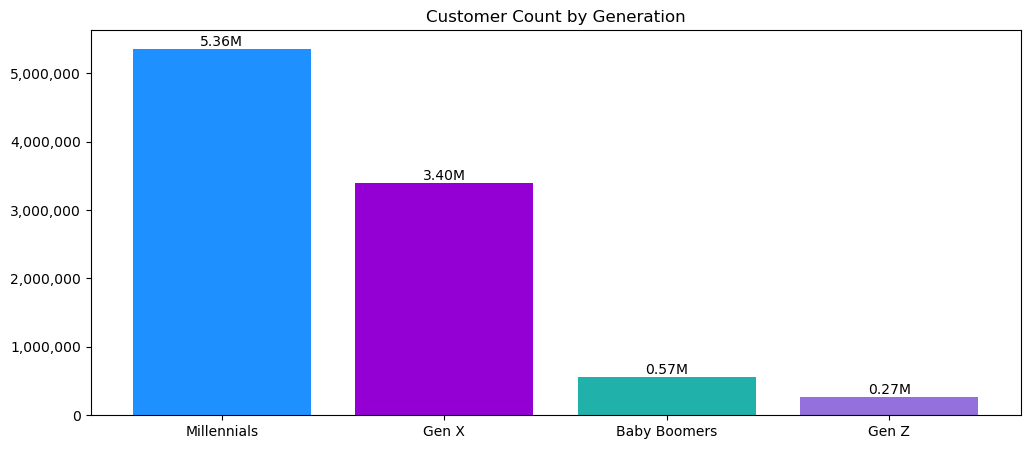

In [31]:
# create a horizontal bar chart
colors = ['dodgerblue', 'darkviolet','lightseagreen', 'mediumpurple','hotpink']

fig, ax = plt.subplots()
ax.bar(gen_count.index, gen_count.values, color = colors)

formatter = mtick.FuncFormatter(lambda x, p: format(int(x), ','))
ax.yaxis.set_major_formatter(formatter)

# add data values to the chart
for i, value in enumerate(gen_count.values):
    plt.text(i, value, f'{value/1000000:,.2f}M', ha='center', va='bottom')

plt.title('Customer Count by Generation')
plt.show()

---

### Insight

Millennials (those born between 1981-1996) make up the largest customer segment, with ~5.36M total count. Gen X (those born between 1965-1980) are the second-largest customer segment, with ~3.40M total count. Baby Boomers (those born between 1946-1964) make up the third customer segment, with ~565K customers, and Gen Z (those born between 1997-2012) are the smallest customer segment, with just about 269K total count.

### Recommendation

We should keep up with technology trends and preferences of each generation to ensure that our services are relevant and up-to-date. For example, we can invest in mobile apps and digital tools that cater to millennials and Gen Zs customers who are more likely to use mobile devices to access services.

---

In [32]:
gen_by_gend = df_crm.groupby(['generation','gender'])['msisdn'].nunique().unstack(fill_value=0)\
.sort_values(by='Male', ascending = False)

gen_by_gend_sort = gen_by_gend[['Male', 'Female']]
gen_by_gend_sort

gender,Male,Female
generation,,
Millennials,4881868,666342
Gen X,3005996,563865
Baby Boomers,517459,69691
Gen Z,252733,18011


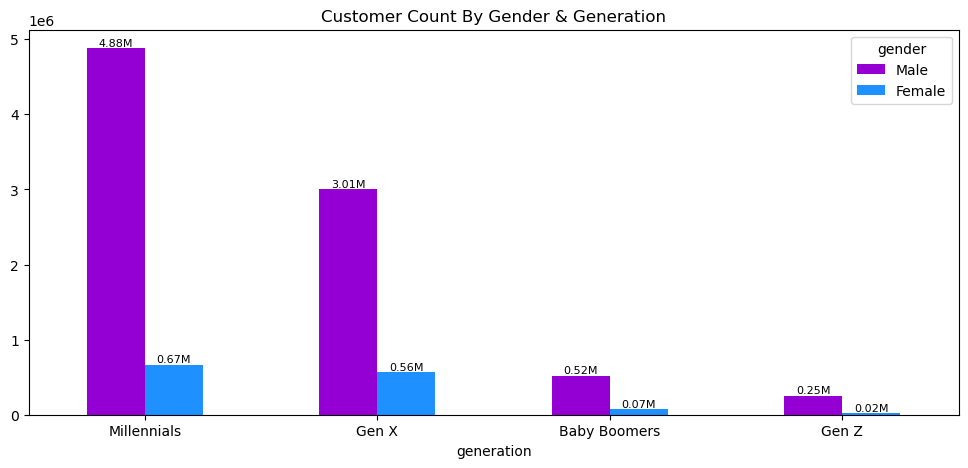

In [33]:
# plot the line chart
colors = ['darkviolet','dodgerblue']

ax = gen_by_gend_sort.plot(kind='bar', color = colors)

# Add data labels
for p in ax.containers:
    ax.bar_label(p, label_type='edge', labels=[f'{x/1000000:,.2f}M' for x in p.datavalues], fontsize=8)


# set the chart title and labels
plt.title('Customer Count By Gender & Generation')


plt.xticks(rotation = 0)
plt.show()


---

### Insight

In each generation, males constitute a larger proportion of customers than females. Millennials (those born between 1981-1996) have the largest customer segment for both males and females, while Gen Z (those born between 1997-2012) has the smallest customer segment for both males and females.

### Recommendation

We should conduct further analysis to better understand the differences in customer behavior and preferences between males and females in each generation. This could involve conducting surveys and focus groups to gain more insights into the unique needs and preferences of each customer segment.

---

In [34]:
#Clustering/segmenting the customers

# Create a new dataframe with columns to be clustered
df_cluster = df_crm[['year_of_birth']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster)

# Create a KMeans object
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the data to the KMeans object
kmeans.fit(scaled_data)

# Get the labels and assign to the original dataframe
df_crm['cluster_label'] = kmeans.labels_

# Print the clusters
clustered = df_crm.groupby('cluster_label')['year_of_birth'].describe()

# Create a dictionary to map old labels to new labels
label_map = {0: 'Cluster 1 - 1983 to 1989', 1: 'Cluster 2 - 1969 - 1975', 2: 'Cluster 3 - 1990 - 2013',\
             3: 'Cluster 4 - 1958 - 1968', 4: 'Clster 5 - 1976 - 1982'}

# Replace old labels with new ones
clustered.index = clustered.index.map(label_map)


clustered

,count,mean,std,min,25%,50%,75%,max
cluster_label,,,,,,,,
Cluster 1 - 1983 to 1989,3115149.0,1986.204307,1.989936,1983.0,1985.0,1986.0,1988.0,1989.0
Cluster 2 - 1969 - 1975,1488764.0,1972.154691,1.919342,1969.0,1971.0,1972.0,1974.0,1975.0
Cluster 3 - 1990 - 2013,2070776.0,1992.849118,2.204606,1990.0,1991.0,1993.0,1994.0,2013.0
Cluster 4 - 1958 - 1968,1227455.0,1964.042706,3.092801,1958.0,1962.0,1965.0,1967.0,1968.0
Clster 5 - 1976 - 1982,2328068.0,1979.376093,1.979139,1976.0,1978.0,1980.0,1981.0,1982.0


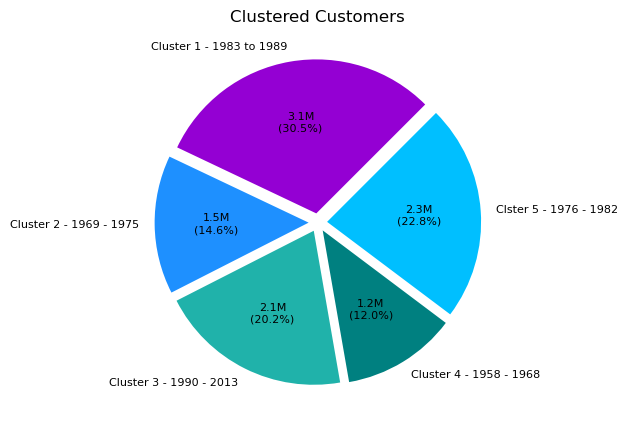

In [35]:

colors = ['darkviolet', 'dodgerblue', 'lightseagreen','teal','deepskyblue','cadetblue','olive','lightcoral']

explode = [0.06,0.06,0.06,0.06, 0.06]
textprops = {'fontsize':8, 'color': 'black'}
cluster_count = clustered['count']/100000000

fig, ax = plt.subplots()

def actual_and_percentage(val):
    actual_val = val * cluster_count.sum()
    percentage_val = val
    return f'{actual_val:.1f}M\n({percentage_val:.1f}%)'

# Plot the count values on a pie chart
cluster_count.plot.pie(autopct=actual_and_percentage, startangle=45, explode = explode,\
                       colors = colors, textprops = textprops)

# Add a title to the chart
plt.title('Clustered Customers')


plt.axis('off')
plt.show()


---

### Insight

Cluster 1 has the highest number of customers, with over 3 million customers, while Cluster 4 has the lowest number of customers, with just over 1.2 million customers.

The mean birth year for each cluster indicates that Cluster 3 represents the youngest age group, while Cluster 4 represents the oldest age group.

The standard deviation for each cluster also indicates that there is more variation in birth years in Cluster 3 than in the other clusters.

The quartiles for each cluster show that the range of birth years is narrower in Clusters 1 and 4, while the range is wider in Clusters 2 and 3.

### Recommendation

We should focus on Cluster 3 since it represents the largest age group of our customers. We should also consider targeting Clusters 1 and 4, which have a narrower range of birth years, as these clusters may have specific needs and preferences that we can address. We can again use this information to tailor our marketing strategies and products to the different age groups represented by each cluster.

---

In [36]:
# Calculate the silhouette score to evaluate the cluster - takes a long time to run

#silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)

#print("The average silhouette_score is :", silhouette_avg)

### Data Preprocessing for the IoT devices dataframe

In [37]:
# Check the next dataframe and the analysis we can make out of it

df_dev.head()

,msisdn,imei_tac,brand_name,model_name,os_name,os_vendor
0,c0e80ecc67484f293db0cf723146c9d6,7ce90a5469d6a07dc8c770956cc29482,SAMSUNG,GALAXY J1 ACE (SM-J111F),Android,Google
1,2bce0cd398cbc9b2478ecaf1ef62b2c1,110f73736e1e1fe0ef5cb8a581bc0ec2,WALTON,OLVIO L22,NaN,NaN
2,d7b8b49fafb853a3aef0c20d49bca845,ddf90b7c597d7714637ecde342a8c609,LG,W1500,LG OS,LG
3,d628f3b548dc74c5fde92323c61c819e,c395eac49569e6741faf98284aef725c,SYMPHONY,B13,NaN,NaN
4,e33e767a53a8dceadebc3354221bbf6a,395b163b071e5880e66ac57c5768673e,SAMSUNG,METRO SM-B350ED,Samsung OS,Samsung


In [38]:
# Checking for blank or null values

df_dev.isnull().any()

msisdn        False
imei_tac      False
brand_name     True
model_name     True
os_name        True
os_vendor      True
dtype: bool

In [39]:
# Checking the total observations by row

df_dev.count()

msisdn        2440100
imei_tac      2440100
brand_name    2409654
model_name    2409654
os_name       1762386
os_vendor     1779628
dtype: int64

In [40]:
# Remove blanks from the OS name and OS vendor

df_dev.dropna(subset=['os_name','os_vendor'], inplace = True)

In [41]:
# Check for changes

df_dev.count()

msisdn        1762371
imei_tac      1762371
brand_name    1762371
model_name    1762371
os_name       1762371
os_vendor     1762371
dtype: int64

In [42]:
# Basic statistics 

df_dev.describe()

,msisdn,imei_tac,brand_name,model_name,os_name,os_vendor
count,1762371,1762371,1762371,1762371,1762371,1762371
unique,1733416,22784,836,9390,40,23
top,aa4811f3eab37e51aadc5d19d4cd80fc,445035141fa0d21fc9cc160f0355634b,SAMSUNG,GURU MUSIC II (SM-B310E),Android,Google
freq,4,11069,557907,48490,1073506,1073506


In [43]:
# Check if there are still null values

df_dev.isnull().any()

msisdn        False
imei_tac      False
brand_name    False
model_name    False
os_name       False
os_vendor     False
dtype: bool

In [44]:
# Find unique set of values

df_dev['os_name'].unique()

array(['Android', 'LG OS', 'Samsung OS', 'Proprietary OS', 'iOS',
       'SPREADTRUM OS', 'Nokia OS', 'Symbian OS', 'ISA', 'Series40',
       'Series30', 'BADA', 'Tizen', 'Windows phone', 'NUCLEUS',
       'Series60', 'Asha Software', 'MTK RTOS', 'VRTXmc', 'RTK',
       'Siemens OS', 'Blackberry OS', 'Windows Mobile', 'BELLE',
       'MOCOR OS', 'Linux', 'MotoMagX', 'Rex', 'NucleusPLUS',
       'Firefox OS', 'Yun OS', 'Panasonic OS', 'Windows', 'MEEGO',
       'LiMo OS', 'Motorola Proprietary', 'Blackberry Playbook OS',
       'BREW', 'PalmOS', 'AMX4-Thumb'], dtype=object)

In [45]:
# Grouping the brand name and counting the unique customers

dev_brand = df_dev.groupby('brand_name')['msisdn'].nunique().sort_values(ascending = False)
top_brands = dev_brand.head(50)
top_brands

brand_name
SAMSUNG             551666
NOKIA               298436
SYMPHONY            219991
HUAWEI              100761
SB TEL               58910
ITEL                 50790
WALTON               50670
LAVA                 42696
XIAOMI               42318
OPPO                 39615
WINMAX               25410
KINGSTAR             23992
LENOVO               20724
APPLE                18276
MICROMAX             17680
WINSTAR              16006
HTC                  10917
AAMRA                 7761
MAXIMUS               5871
ERICSSON              5792
HOTWAV                5642
GREYMARKET            5479
VIVO                  5358
LG                    5180
WESTERN               4358
ASUS                  4227
PEACE                 4135
SONYERICSSON          4129
ALCATEL               3778
TINMO                 3745
MYCELL                3740
MICROSOFT             3712
WALTON DIGI-TECH      3703
IMAM TELECOM          3533
RANGS                 3533
G-PHONE               3451
TECNO            

/var/folders/hk/s0hjzjs5759flr4gkndn94xr0000gn/T/ipykernel_54302/2985818195.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_brands.index, rotation=90,fontsize = 8)


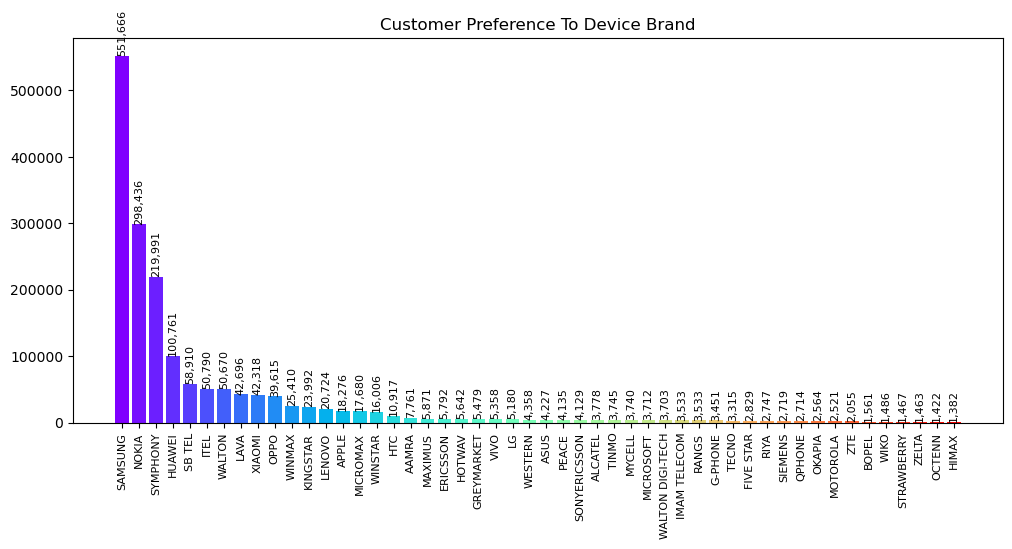

In [46]:
# create a bar chart of the above result

fig, ax = plt.subplots()
ax.bar(top_brands.index, top_brands.values, color = cmap(np.linspace(0, 1, len(top_brands.values))))

# rotate the x-axis labels by 45 degrees
ax.set_xticklabels(top_brands.index, rotation=90,fontsize = 8)

# add data values to the chart
for i, value in enumerate(top_brands.values):
    plt.text(i, value, f'{value:,.0f}', ha='center', va='bottom', rotation = 90, fontsize = 8)

plt.title('Customer Preference To Device Brand')
plt.show()

In [47]:
other_brands = df_dev.groupby('brand_name')['msisdn'].nunique().sort_values(ascending = False)
#other_filters = other_brands
bottom_20 = other_brands.tail(50)
bottom_20

brand_name
TAMBO                  1
TAKEE                  1
EAKASH                 1
T SERIES               1
EASTMAN KODAK          1
SWS                    1
EBEST                  1
SWELL TECHNOLOGY       1
ECTEL                  1
SUPRA                  1
ELEPHONE               1
ELIYA                  1
SIXSTAR                1
SIXBULLS               1
SINTAVE                1
FXD                    1
GOODONE                1
GRSED                  1
GUO WEI                1
GUOMI COMMUNICATION    1
HANDXOM                1
HASEE                  1
HK AARDMEN             1
RICHMAX                1
REYSOL                 1
RELIANCE COM           1
HONGWO ERA             1
RAYBO                  1
HUAFURUI               1
HUALU                  1
RAENO                  1
GOLDGOAL               1
GNINE                  1
SAMURAI                1
SHOWN                  1
G-MAX                  1
GAMMA                  1
SIMMTRONICS            1
GAOKE                  1
GATEL         

/var/folders/hk/s0hjzjs5759flr4gkndn94xr0000gn/T/ipykernel_54302/3670452818.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(bottom_20.index, rotation=90,fontsize = 8)


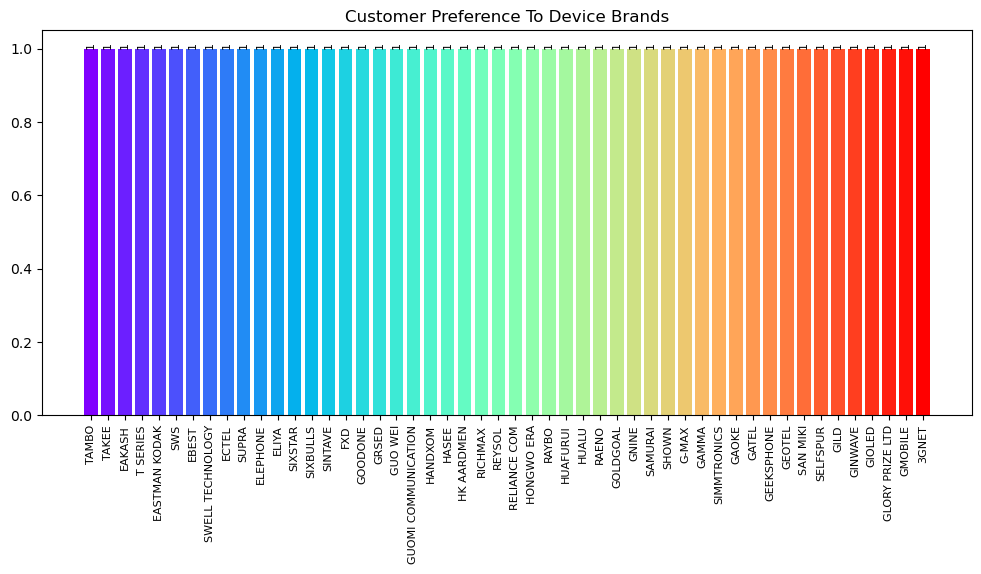

In [48]:
# create a bar chart of the above result

fig, ax = plt.subplots()
ax.bar(bottom_20.index, bottom_20.values, color = cmap(np.linspace(0, 1, len(bottom_20.values))))

# rotate the x-axis labels by 45 degrees
ax.set_xticklabels(bottom_20.index, rotation=90,fontsize = 8)

# add data values to the chart
for i, value in enumerate(bottom_20.values):
    plt.text(i, value, f'{value:,.0f}', ha='center', va='bottom', rotation = 90, fontsize = 8)

plt.title('Customer Preference To Device Brands')
plt.show()

---

### Insight

Of our top 20 device brands, Samsung is the most popular device brand with more than double the number of purchases than the second-ranked brand, Nokia. Nokia, despite having lost much of its market share, is still the second most purchased brand by our customers.

Symphony, a relatively lesser-known brand, has a considerable number of purchases, indicating that it is gaining popularity among our customers.

Huawei, a Chinese multinational technology company, is the fourth most sought brand, indicating its growing popularity.

The remaining brands, including SB TEL, ITEL, Walton, Lava, Xiaomi, Oppo, Winmax, Kingstar, Lenovo, Apple, Micromax, Winstar, HTC, AAMRA, Maximus, and Ericsson, are also purchased frequently by our customers, although they are less popular than the top four brands.



### Recommendation

Overall, the list indicates that Samsung and Nokia are the most popular device brands, but other brands such as Symphony and Huawei are gaining popularity among consumers. The list also provides insight into the competition among device brands, which is an important consideration for our suppliers, manufacturers and marketers.

---

In [49]:
# Summarize the device model by customers

dev_model = df_dev.groupby('model_name')['msisdn'].nunique().sort_values(ascending = False)
top_models = dev_model.head(20)
top_models

model_name
GURU MUSIC II (SM-B310E)                 48129
GALAXY J2 (SM-J200H)                     26732
GALAXY GRAND PRIME DUOS (SM-G532F DS)    26064
105, 1050 (RM-908)                       23430
SYMPHONY B12, D115                       22803
108 DUAL SIM (RM-944)                    22045
GALAXY J1 (SM-J110HDS)                   21685
BL60, D54I                               21284
1280, 1282                               21152
105 DS (TA-1034)                         20069
L25, FT42, W130, W69                     19814
V75                                      18998
GALAXY J2 PRIME DUOS (SM-G532G DS)       18631
GALAXY J1 (SM-J100H DS)                  13476
105 (RM-1134)                            13459
GALAXY S DUOS II (GT-S7582)              12379
GALAXY J1 ACE DUOS (SM-J111F DS)         11154
GALAXY J2 2016 (SM-J210F)                11146
I10                                      11069
105 DUAL SIM (RM-1133)                   10518
Name: msisdn, dtype: int64

/var/folders/hk/s0hjzjs5759flr4gkndn94xr0000gn/T/ipykernel_54302/1835151622.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_models.index, rotation=90,fontsize = 7)


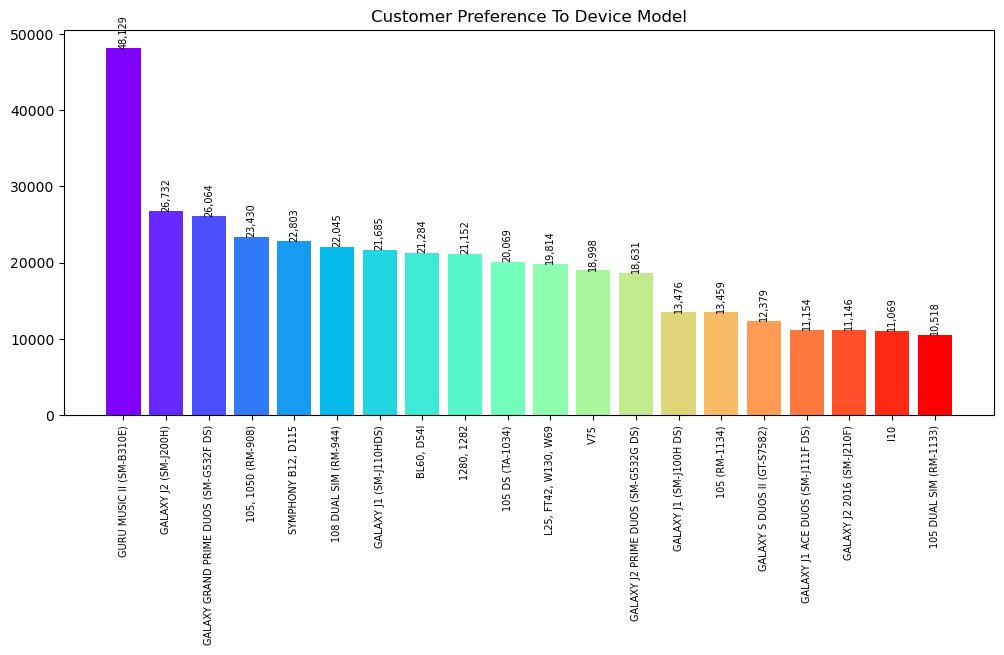

In [50]:
# create a bar chart of the above result

fig, ax = plt.subplots()
ax.bar(top_models.index, top_models.values, color = cmap(np.linspace(0, 1, len(top_models.values))))

# rotate the x-axis labels by 45 degrees
ax.set_xticklabels(top_models.index, rotation=90,fontsize = 7)

# add data values to the chart
for i, value in enumerate(top_models.values):
    plt.text(i, value, f'{value:,.0f}', ha='center', va='bottom', rotation = 90, fontsize = 7)

plt.title('Customer Preference To Device Model')
plt.show()

---

### Insight

Of the top 20 device models, Samsung dominates the list with 12 out of 20 models being Samsung devices. This suggests that Samsung is a popular brand among the customer base. Another insight is that some of the models on the list are relatively old, such as the GURU MUSIC II and RM-908, suggesting that some customers may prefer simpler and more affordable devices.



### Recommendation

We should focus on offering more Samsung devices as they appear to be the most popular among our customers. Additionally, we could consider offering more affordable and simpler devices such as the GURU MUSIC II and RM-908 to cater to customers who still prefer these types of devices.

---

In [51]:
# Summarize the OS name by customers

dev_os = df_dev.groupby('os_name')['msisdn'].nunique().sort_values(ascending = False)
top_os = dev_os.head(20)
top_os

os_name
Android           1062436
Proprietary OS     280950
Symbian OS         160818
Samsung OS          77871
Series30            61233
Series40            40339
iOS                 18283
Nokia OS             9794
Series60             7695
MTK RTOS             7306
Windows phone        5164
BADA                 5122
Siemens OS           2315
SPREADTRUM OS        1963
LG OS                1634
Tizen                1281
Asha Software        1205
NUCLEUS              1072
Blackberry OS         632
VRTXmc                567
Name: msisdn, dtype: int64

/var/folders/hk/s0hjzjs5759flr4gkndn94xr0000gn/T/ipykernel_54302/380073289.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_os.index, rotation = 90, fontsize = 8,)


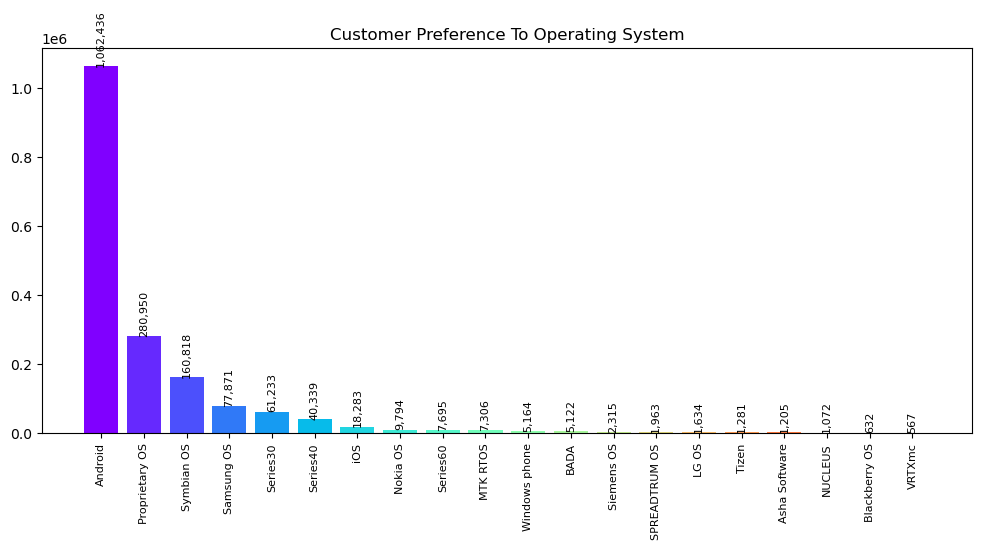

In [52]:
# Plot a bar chart of the above result

fig, ax = plt.subplots()
ax.bar(top_os.index, top_os.values, color = cmap(np.linspace(0, 1, len(top_os.values))))

#rotate the x axis
ax.set_xticklabels(top_os.index, rotation = 90, fontsize = 8,)

#add data labels
for i, values in enumerate(top_os.values):
    plt.text(i,values, f'{values:,.0f}',ha = 'center', va = 'bottom', rotation = 90, fontsize = 8)

plt.title('Customer Preference To Operating System')
plt.show()

---

### Insight

From the above analysis, it is obvious that Android is the most widely used operating system, followed by the Proprietary OS and Symbian OS. It's also interesting to note that Samsung has its own operating system, which is used by a significant number of customers.



### Recommendation

We should prioritize the development and testing of apps on Android and Proprietary OS since they are the most popular operating systems. Additionally, it may be worth considering the development of apps for Samsung's operating system, given the significant number of customers using it. However, it's important to keep in mind that, some other operating systems still have a considerable user base, so it may be necessary to support these platforms as well.

---

In [53]:
# Summarize the OS vendor by customers

dev_osven = df_dev.groupby('os_vendor').size().sort_values(ascending = False)
top_vendors = dev_osven.head(20)
top_vendors

os_vendor
Google             1073506
Proprietary OS      282128
Symbian             280902
Samsung              84860
Apple                18328
Motorola              7367
Microsoft             5366
Siemens               2315
SPREADTRUM            2045
LG                    1634
Mentor Graphics       1568
NOKIA                 1394
RIM                    633
ALIBABA                122
MOCOR                   81
Panasonic               38
NXP LTD                 26
Qualcomm                23
Montavista              17
Mozilla                 11
dtype: int64

/var/folders/hk/s0hjzjs5759flr4gkndn94xr0000gn/T/ipykernel_54302/2995255666.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_vendors.index, rotation = 90, fontsize = 8)


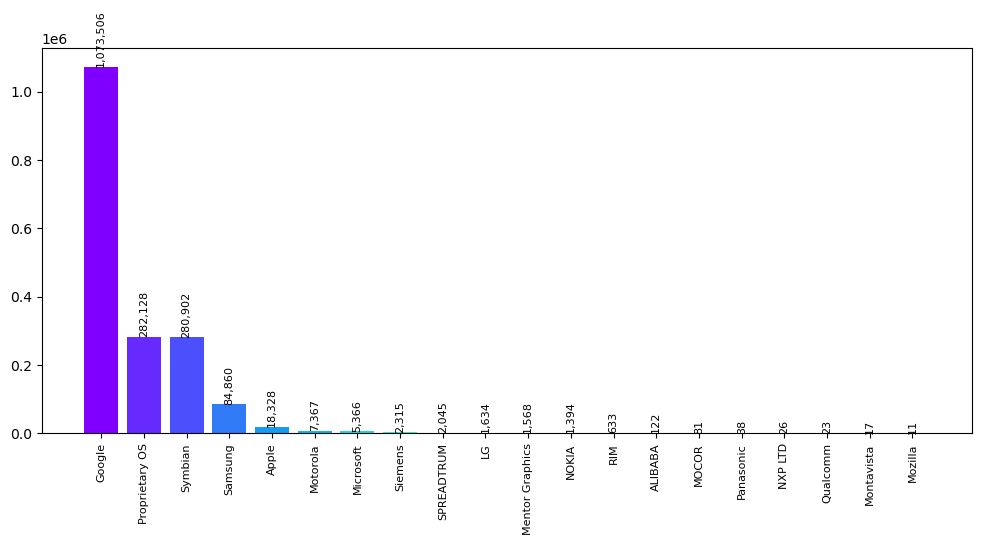

In [54]:
# Plot the above result with a bar chart

fig, ax = plt.subplots()
ax.bar(top_vendors.index, top_vendors.values, color = cmap(np.linspace(0, 1, len(top_vendors.values))))

#rotate x axis
ax.set_xticklabels(top_vendors.index, rotation = 90, fontsize = 8)

#add data labels
for i, values in enumerate(top_vendors.values):
    plt.text(i,values, f'{values:,.0f}', ha = 'center', va = 'bottom', rotation = 90, fontsize = 8)

plt.show()

---

### Insight

From the above top 20 analysis on the OS vendors, it is observed that Google is the market leader with over 1 million users, followed by Proprietary OS and Symbian. Filtering further shows that, Samsung and Apple are also among the top five vendors our customers opted for.



### Recommendation

Since Google is the market leader, we can only hope that the company continue to invest in their Android operating system and ensure it remains user-friendly and efficient. For the other vendors, and since we do not have much control on what they do, we can also hope that they focus on improving their operating systems to make them more competitive and attractive to users. Some of the vendors could also consider forming partnerships or collaborations to develop more robust and efficient operating systems.

---

### Data checks for the Revenue dataframe

In [55]:
# check the dataframe

df_rev.head(5)

,msisdn,week_number,revenue_usd
0,66e94d24d8e0d5776a8a6b694782eff0,26,20.265621
1,66e94d24d8e0d5776a8a6b694782eff0,34,5.361164
2,66e94d24d8e0d5776a8a6b694782eff0,31,18.181347
3,66e94d24d8e0d5776a8a6b694782eff0,35,16.857391
4,66e94d24d8e0d5776a8a6b694782eff0,24,14.392326


In [56]:
# Check the number of observations

df_rev.count()

msisdn         1704601
week_number    1704601
revenue_usd    1704601
dtype: int64

In [57]:
# summarize the weekly revenue

weekly_rev = df_rev.groupby('week_number')['revenue_usd'].sum()

weekly_rev_sorted = weekly_rev.sort_index(ascending = True)
weekly_rev_sorted

week_number
22    1.131492e+06
23    1.345769e+06
24    1.401579e+06
25    1.204059e+06
26    1.207353e+06
27    1.226947e+06
28    1.240163e+06
29    1.324735e+06
30    1.340423e+06
31    1.496534e+06
32    1.539966e+06
33    1.587264e+06
34    1.644657e+06
35    1.609813e+06
Name: revenue_usd, dtype: float64

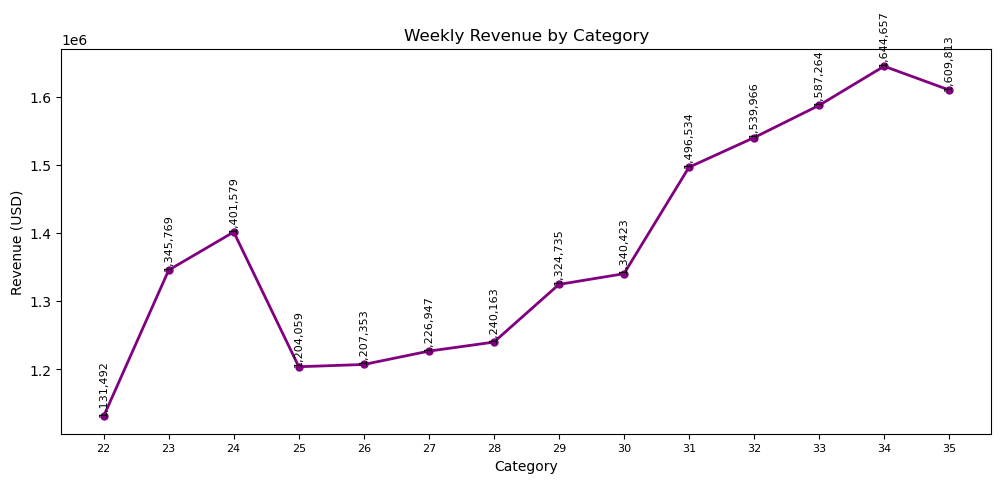

In [58]:
fig, ax = plt.subplots()

# Set x-axis tick labels
ax.set_xticks(range(len(weekly_rev_sorted.index)))
ax.set_xticklabels(weekly_rev_sorted.index, rotation=0, fontsize=8)

# Plot line chart
ax.plot(range(len(weekly_rev_sorted.index)), weekly_rev_sorted.values, \
       color = 'purple', linewidth=2, marker='o', markersize=5)

# Add data labels
for i, value in enumerate(weekly_rev_sorted.values):
    ax.text(i, value, f'{value:,.0f}', ha='center', va='bottom', rotation=90, fontsize=8)

# Set chart title and labels
ax.set_title('Weekly Revenue by Category')
ax.set_xlabel('Category')
ax.set_ylabel('Revenue (USD)')

plt.show()


---

### Insight

Based on the weekly revenue analysis as seen above, it appears that the revenue has been relatively consistent over the past few weeks with only some minor fluctuations. There was a gradual revenue spikes from week 28 to 34 with a little dip in week 35. 



### Recommendation

We may want to investigate the cause of the dip in revenue for week 35, in order to prevent a similar occurrence in the future. It may be worth looking into factors such as marketing campaigns, changes in pricing, or fluctuations in demand. Additionally, it may be beneficial to identify and capitalize on the factors that contributed to the increase in revenue from week 28 onwards. This could involve further analysis of customer behavior, purchasing patterns, or seasonal trends.

---

## Putting all together by merging all the 3 different dataframes

This will give me deeper understanding of the customers, their behavior, and their preferences, and use this knowledge to optimize our business operations and increase revenue growth.

In [59]:
# Merging the dataframes

first_df = pd.merge(df_crm, df_dev, on='msisdn', how='inner')
df = pd.merge(first_df, df_rev, on='msisdn', how='inner')

# Define a formatting function
def format_revenue(x):
    return "{:.2f}".format(x)

# Apply the formatting function to the revenue_usd column
df['revenue_usd'] = df['revenue_usd'].apply(format_revenue)

df['revenue_usd'] = pd.to_numeric(df['revenue_usd'], errors='coerce')

df.head(5)

,msisdn,gender,year_of_birth,system_status,mobile_type,value_segment,generation,cluster_label,imei_tac,brand_name,model_name,os_name,os_vendor,week_number,revenue_usd
0,4f5216988c44ec0a96a82a04f28b49fa,Male,1988.0,ACTIVE,Prepaid,Tier_3,Millennials,0,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,34,8.39
1,4f5216988c44ec0a96a82a04f28b49fa,Male,1988.0,ACTIVE,Prepaid,Tier_3,Millennials,0,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,24,4.57
2,4f5216988c44ec0a96a82a04f28b49fa,Male,1988.0,ACTIVE,Prepaid,Tier_3,Millennials,0,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,30,19.58
3,4f5216988c44ec0a96a82a04f28b49fa,Male,1988.0,ACTIVE,Prepaid,Tier_3,Millennials,0,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,31,9.27
4,4f5216988c44ec0a96a82a04f28b49fa,Male,1988.0,ACTIVE,Prepaid,Tier_3,Millennials,0,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,33,13.29


In [60]:
df.count()

msisdn           117314
gender           117314
year_of_birth    117314
system_status    117314
mobile_type      117314
value_segment    117314
generation       117314
cluster_label    117314
imei_tac         117314
brand_name       117314
model_name       117314
os_name          117314
os_vendor        117314
week_number      117314
revenue_usd      117314
dtype: int64

## ARPU

In [61]:
# Group the dataframe by 'msisdn' and 'week_number', and calculate the mean of 'revenue_usd' for each group
revenue_per_customer = df.groupby('week_number')['revenue_usd'].mean()

# Reset the index of the resulting dataframe
revenue_per_customer = revenue_per_customer.reset_index()

# Rename the 'revenue_usd' column to 'revenue_per_customer'
revenue_per_customer = revenue_per_customer.rename(columns={'revenue_usd': 'revenue_per_customer'})

# Merge the resulting dataframe back into the original dataframe on the 'msisdn' and 'week_number' columns
df = pd.merge(df, revenue_per_customer, on=['week_number'], how='left')


In [62]:
df.head(10)

,msisdn,gender,year_of_birth,system_status,mobile_type,value_segment,generation,cluster_label,imei_tac,brand_name,model_name,os_name,os_vendor,week_number,revenue_usd,revenue_per_customer
0,4f5216988c44ec0a96a82a04f28b49fa,Male,1988.0,ACTIVE,Prepaid,Tier_3,Millennials,0,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,34,8.39,12.375656
1,4f5216988c44ec0a96a82a04f28b49fa,Male,1988.0,ACTIVE,Prepaid,Tier_3,Millennials,0,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,24,4.57,12.235951
2,4f5216988c44ec0a96a82a04f28b49fa,Male,1988.0,ACTIVE,Prepaid,Tier_3,Millennials,0,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,30,19.58,11.297877
3,4f5216988c44ec0a96a82a04f28b49fa,Male,1988.0,ACTIVE,Prepaid,Tier_3,Millennials,0,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,31,9.27,11.892329
4,4f5216988c44ec0a96a82a04f28b49fa,Male,1988.0,ACTIVE,Prepaid,Tier_3,Millennials,0,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,33,13.29,12.045107
5,4f5216988c44ec0a96a82a04f28b49fa,Male,1988.0,ACTIVE,Prepaid,Tier_3,Millennials,0,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,35,23.12,12.321961
6,4f5216988c44ec0a96a82a04f28b49fa,Male,1988.0,ACTIVE,Prepaid,Tier_3,Millennials,0,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,32,13.27,11.706900
7,4f5216988c44ec0a96a82a04f28b49fa,Male,1988.0,ACTIVE,Prepaid,Tier_3,Millennials,0,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,22,8.61,10.987794
8,4f5216988c44ec0a96a82a04f28b49fa,Male,1988.0,ACTIVE,Prepaid,Tier_3,Millennials,0,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,28,7.70,10.935474
9,4f5216988c44ec0a96a82a04f28b49fa,Male,1988.0,ACTIVE,Prepaid,Tier_3,Millennials,0,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,23,0.25,11.993482


In [63]:
# summarize the weekly revenue

arpu = df.groupby('week_number')['revenue_per_customer'].mean()

arpu_per_cust = arpu.sort_index(ascending = True)
arpu_per_cust

week_number
22    10.987794
23    11.993482
24    12.235951
25    10.836076
26    11.055470
27    11.079330
28    10.935474
29    11.209868
30    11.297877
31    11.892329
32    11.706900
33    12.045107
34    12.375656
35    12.321961
Name: revenue_per_customer, dtype: float64

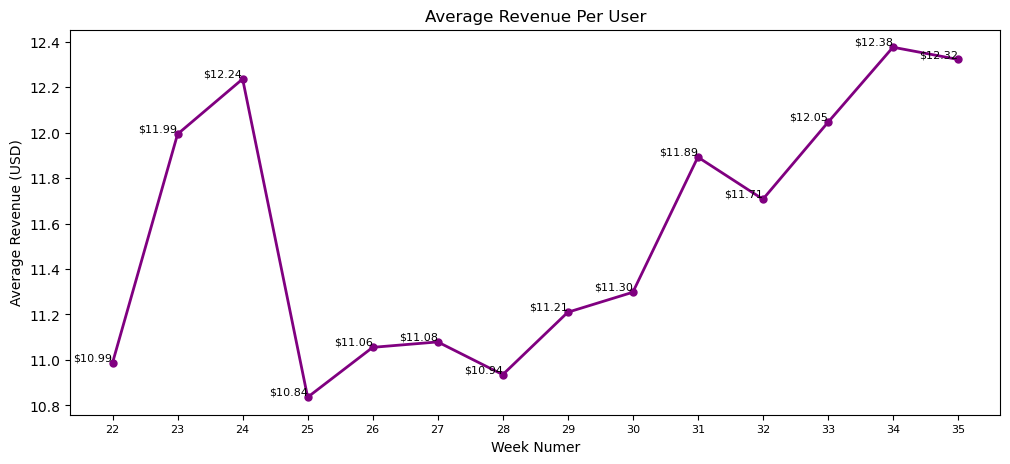

In [96]:
fig, ax = plt.subplots()

# Set x-axis tick labels
ax.set_xticks(range(len(arpu_per_cust.index)))
ax.set_xticklabels(arpu_per_cust.index, rotation=0, fontsize=8)

# Plot line chart
ax.plot(range(len(arpu_per_cust.index)), arpu_per_cust.values, \
       color = 'purple', linewidth=2, marker='o', markersize=5)

# Add data labels
for i, value in enumerate(arpu_per_cust.values):
    ax.text(i, value, f'${value:,.2f}', ha='right', va='bottom', rotation=0, fontsize=8)

# Set chart title and labels
ax.set_title('Average Revenue Per User')
ax.set_xlabel('Week Numer')
ax.set_ylabel('Average Revenue (USD)')

plt.show()


In [65]:
# Create an additional column and map the genders 

df['gender_binary'] = df['gender'].map({'Male': 1, 'Female': 0})

df.head()

,msisdn,gender,year_of_birth,system_status,mobile_type,value_segment,generation,cluster_label,imei_tac,brand_name,model_name,os_name,os_vendor,week_number,revenue_usd,revenue_per_customer,gender_binary
0,4f5216988c44ec0a96a82a04f28b49fa,Male,1988.0,ACTIVE,Prepaid,Tier_3,Millennials,0,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,34,8.39,12.375656,1
1,4f5216988c44ec0a96a82a04f28b49fa,Male,1988.0,ACTIVE,Prepaid,Tier_3,Millennials,0,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,24,4.57,12.235951,1
2,4f5216988c44ec0a96a82a04f28b49fa,Male,1988.0,ACTIVE,Prepaid,Tier_3,Millennials,0,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,30,19.58,11.297877,1
3,4f5216988c44ec0a96a82a04f28b49fa,Male,1988.0,ACTIVE,Prepaid,Tier_3,Millennials,0,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,31,9.27,11.892329,1
4,4f5216988c44ec0a96a82a04f28b49fa,Male,1988.0,ACTIVE,Prepaid,Tier_3,Millennials,0,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,33,13.29,12.045107,1


In [66]:
# Check basic stats on the df

df.describe()

,year_of_birth,cluster_label,week_number,revenue_usd,revenue_per_customer,gender_binary
count,117314.000000,117314.000000,117314.000000,117314.000000,117314.000000,117314.000000
mean,1981.153204,1.823448,28.774861,11.603054,11.603054,0.863784
std,9.368067,1.536297,4.048452,6.042371,0.545441,0.343019
min,1958.000000,0.000000,22.000000,0.020000,10.836076,0.000000
25%,1975.000000,0.000000,25.000000,6.502500,11.055470,1.000000
50%,1983.000000,2.000000,29.000000,11.550000,11.706900,1.000000
75%,1989.000000,3.000000,32.000000,16.627500,12.045107,1.000000
max,2000.000000,4.000000,35.000000,82.920000,12.375656,1.000000


In [67]:
# Analyze the generation & gender against the total revenue

gnr_gend = df.groupby(['generation','gender'])['revenue_usd'].sum().unstack()
sorted_gnr_gend = gnr_gend[['Male','Female']].sort_values(by= ['Male', 'Female'], ascending = False)
sorted_gnr_gend

gender,Male,Female
generation,,
Millennials,664563.66,90677.91
Gen X,414518.32,81862.57
Baby Boomers,69282.24,9303.83
Gen Z,28857.22,2134.88


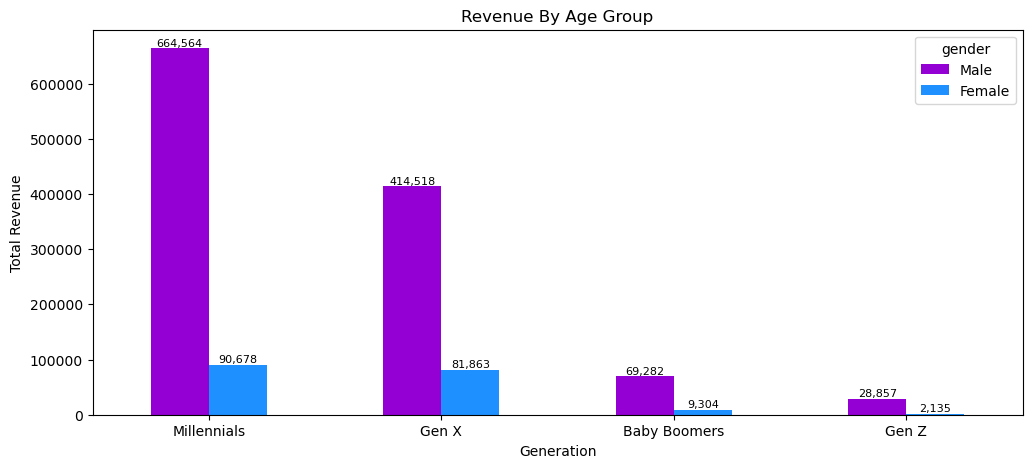

In [68]:
# plot the above on a bar chart

ax = sorted_gnr_gend.plot(kind='bar', color = colors)

# Add data labels
for p in ax.containers:
    ax.bar_label(p, label_type='edge', labels=[f'{x:,.0f}' for x in p.datavalues], fontsize=8)


# set the chart title and labels
plt.title('Revenue By Age Group')
plt.xlabel('Generation')
plt.ylabel('Total Revenue')

# show the plot
plt.xticks(rotation = 0)
plt.show()


---

### Insight

The highest revenue is generated from the Millennial generation, with Males generating significantly higher revenue than Females. The Gen X generation also generates considerable revenue, with Males generating more than Females.
Baby Boomers and Gen Z generations generate the least revenue, with Baby Boomers generating significantly more than Gen Z.



### Recommendation

To increase revenue, we can focus on targeting the Millennial generation and males in particular as they are the ones generating the most revenue for us. We can then also explore ways to increase revenue from the Gen X generation, as they also generate considerable revenue. Although Baby Boomers and Gen Z generations generate the least revenue, we can still target them by providing them with products and services that are tailored to their needs and preferences. This can help in increasing revenue from these generations as well.


---

In [69]:
# Analyaze the generation by revenue

gnr_rev = df.groupby('generation')['revenue_usd'].sum().sort_values(ascending = False)
gnr_rev

generation
Millennials     755241.57
Gen X           496380.89
Baby Boomers     78586.07
Gen Z            30992.10
Name: revenue_usd, dtype: float64

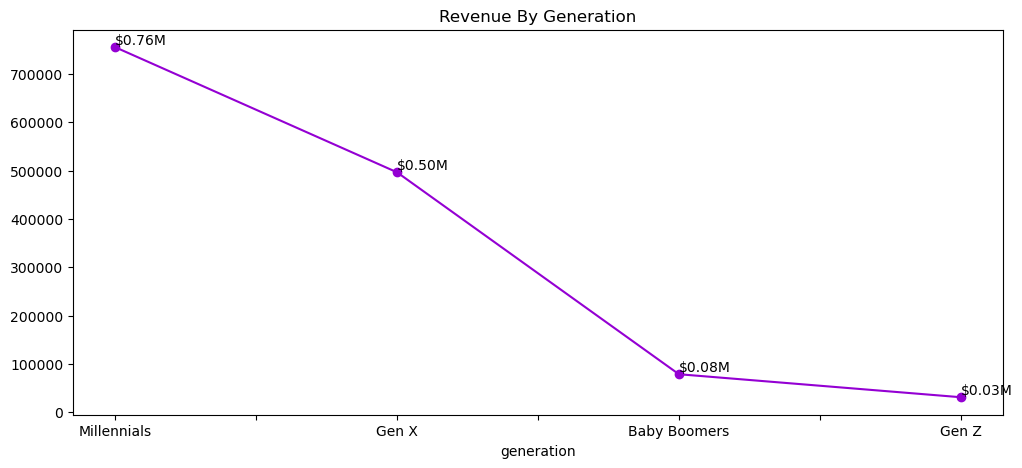

In [97]:
# Plot the above on a line chart

fig, ax = plt.subplots()
ax = gnr_rev.plot(kind='line', color = colors, marker = 'o')

for i, val in enumerate(gnr_rev):
    plt.text(i, val, f'${val/1000000:,.2f}M', ha = 'left', va = 'bottom')

plt.title('Revenue By Generation')
plt.show()

---

### Insight

From the analysis above, the revenue summary by generation is that Millennials and Gen X bring in significantly higher revenues of ~$6.90M and ~$4.83M respectively, compared to Baby Boomers and Gen Z with ~$812K and ~$256K total revenue. This suggests that we may want to focus our marketing and sales efforts on Millennials and Gen X to maximize our revenues.




### Recommendation

Additionally, it could be useful to investigate the reasons behind the differences in revenue between the generations. For example, perhaps Millennials and Gen X are more likely to make larger purchases or to be repeat customers. Identifying and understanding these factors could help us tailor our products and services to better meet the needs and preferences of our target demographics. It's also important to note that this revenue summary is only one aspect of customer behavior and shouldn't be used in isolation to make business decisions. Other factors such as customer acquisition costs and customer lifetime value etc. should also be considered.


---

In [71]:
#Analyze brand name and revenue

rev_brand = df.groupby('brand_name')['revenue_usd'].sum().sort_values(ascending = False)

rev_by_top_brand_dev = rev_brand.head(20)
rev_by_top_brand_dev

brand_name
SAMSUNG         465822.54
NOKIA           267058.95
SYMPHONY        146819.25
HUAWEI           82003.94
SB TEL           41528.38
XIAOMI           35799.53
WALTON           33853.45
OPPO             32937.02
ITEL             29567.30
LAVA             29302.54
APPLE            18232.10
WINMAX           16253.53
LENOVO           15663.72
KINGSTAR         13155.36
MICROMAX         11866.37
HTC               9511.55
WINSTAR           9426.95
AAMRA             6178.76
LG                4955.05
SONYERICSSON      3744.44
Name: revenue_usd, dtype: float64

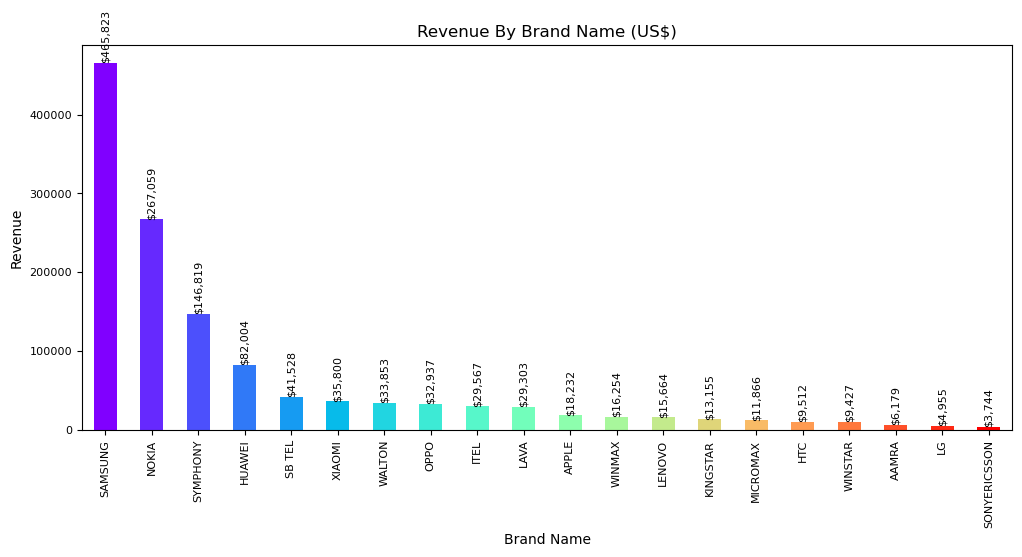

In [98]:
# Plot the above on a bar chart

fig, ax = plt.subplots()
ax = rev_by_top_brand_dev.plot(kind = 'bar', fontsize = 8, color = cmap(np.linspace(0, 1, len(rev_by_top_brand_dev.values))))

for i, val in enumerate(rev_by_top_brand_dev):
    plt.text(i, val, f'${val:,.0f}', ha = 'center', va = 'bottom', fontsize = 8, rotation = 90)

    
    # set the chart title and labels
plt.title('Revenue By Brand Name (US$)')
plt.xlabel('Brand Name')
plt.ylabel('Revenue')

plt.show()

---

### Insight

Based on the above result of the total revenue by brand, the top three brands are Samsung, Nokia, and Symphony, which together account for more than 70% of the total revenue. This indicates that customers prefer these brands and are more likely to purchase devices made by them. 




### Recommendation

We have to focus on these top-performing brands by allocating more resources towards marketing and promotion to further increase their market share. Additionally, we could consider stocking more inventory of these brands to meet customer demand and avoid stockouts. On the other hand, we can also consider reducing or phasing out the less popular brands, such as Sony Ericsson and LG, to cut costs and increase profitability.


---

In [74]:
# Revenue by gender

rev_by_gender = df.groupby('gender')['revenue_usd'].sum().sort_values(ascending = False)
rev_by_gender

gender
Male      1177221.44
Female     183979.19
Name: revenue_usd, dtype: float64

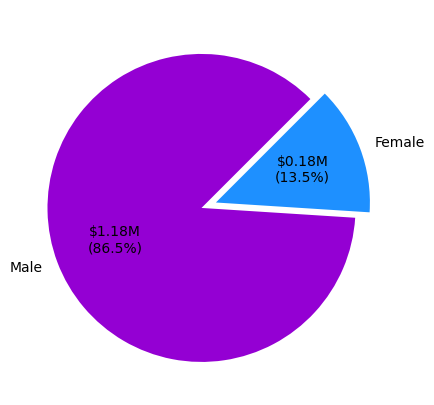

In [75]:
explode = [0.1, 0]

a = rev_by_gender.values/100000000

fig, ax = plt.subplots()

def actual_and_percentage(val):
    actual_val = val * a.sum()
    percentage_val = val
    return f'${actual_val:.2f}M\n({percentage_val:.1f}%)'

rev_by_gender.plot(kind='pie', autopct = actual_and_percentage, startangle = 45, colors = colors, explode = explode)

plt.axis('off')
plt.show()

---

### Insight

The summary of the total revenue by gender shows that the majority of the revenue is generated by male customers with ~$11.17 million. This may indicate a preference for the products or marketing strategies targeted at male customers.






### Recommendation

We may have to conduct further market research to identify the reasons for the gender-based differences in revenue. This could help identify areas where marketing strategies could be improved to attract more female customers and balance out the revenue generated by both genders.

Another recommendation could be to analyze the product offerings and their appeal to different genders. This could involve analyzing the product features, design, and packaging to identify areas that could be improved to better appeal to female customers.


---

In [76]:
# Revenue By Mobile Type 
mob_type_rev = df.groupby('mobile_type')['revenue_usd'].sum().sort_values(ascending = False)
mob_type_rev

mobile_type
Prepaid     1350967.18
Postpaid      10233.45
Name: revenue_usd, dtype: float64

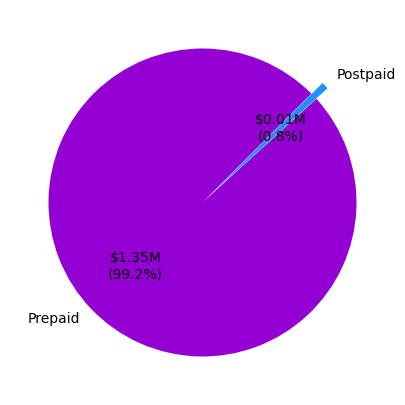

In [77]:
# Plot a Pie chart 

explode = [0,0.1]

b = mob_type_rev / 100000000

def actual_and_percentage(val):
    actual_val = val * b.sum()
    percentage_val = val
    return f'${actual_val:.2f}M\n({percentage_val:.1f}%)'

mob_type_rev.plot(kind = 'pie', colors = colors, autopct = actual_and_percentage, startangle = 45, explode = explode)

plt.axis('off')
plt.show()

---

### Insight

The above shows that the majority of the revenue is generated from the Prepaid mobile service type (with ~$13 million total revenue). This may indicate that customers prefer the flexibility and control of a prepaid mobile plan rather than being locked into a postpaid plan. 





### Recommendation

We may have to focus on offering more attractive prepaid plans and promotions to further increase revenue from this service type. However, it is also important to analyze the profitability of each service type and ensure that our business model is sustainable in the long term.



---

In [78]:
# Revenue By OS Vendor

os_vend_rev = df.groupby('os_vendor')['revenue_usd'].sum().sort_values(ascending = False)
os_vend_rev

os_vendor
Google             820429.84
Symbian            248403.01
Proprietary OS     184467.60
Samsung             73186.34
Apple               18232.10
Microsoft            4278.96
Motorola             3759.09
LG                   1972.27
Siemens              1749.54
SPREADTRUM           1702.73
NOKIA                1437.82
Mentor Graphics       846.06
RIM                   469.24
MOCOR                 179.62
ALIBABA                86.41
Name: revenue_usd, dtype: float64

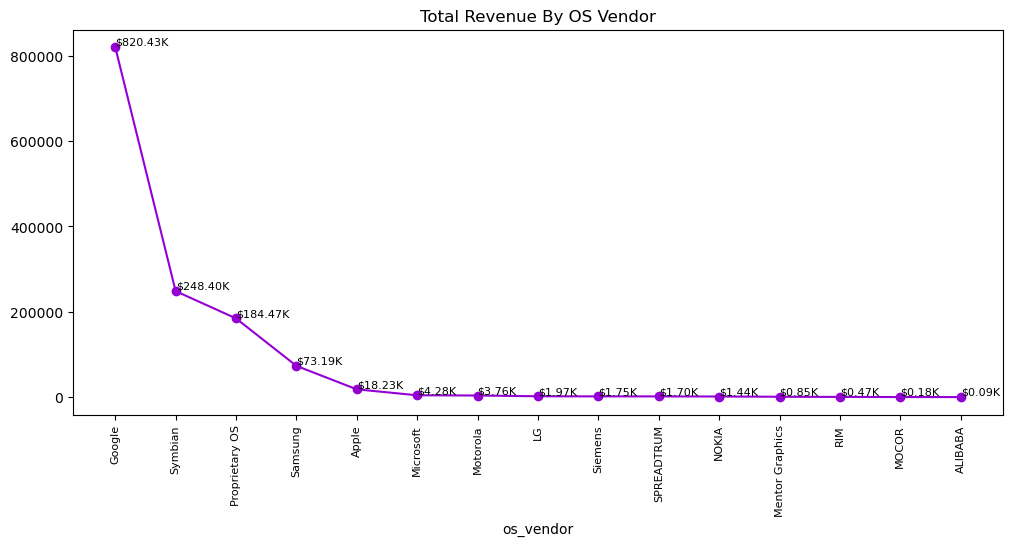

In [99]:
# Plot the above 

fig, ax = plt.subplots()

ax = os_vend_rev.plot(kind='line', color = colors, marker = 'o')

for i, val in enumerate(os_vend_rev):
    plt.text(i, val, f'${val/1000:,.2f}K', fontsize = 8, ha = 'left', va = 'bottom')

# get the x-tick locations and labels
xticks_loc = list(range(len(os_vend_rev.index)))
xticks_labels = os_vend_rev.index

# set the x-tick locations and labels
plt.xticks(xticks_loc, xticks_labels, fontsize = 8, rotation='vertical')

plt.setp(ax.get_xticklabels(), rotation=90)
plt.title('Total Revenue By OS Vendor')
plt.show()

---

### Insight

From the summary of the total revenue by OS vendor, it is clear that Google and Symbian are the leading OS vendors generating the highest revenue of ~$820K and ~$248K respectively. Proprietary OS is also generating significant revenue of ~$184K. However, Samsung, Apple, and Microsoft are generating relatively low revenue compared to the top three OS vendors. 





### Recommendation

We may have to focus more on promoting devices that use Google and Symbian operating systems. We can also consider exploring partnerships with manufacturers of devices that use these OS vendors to increase revenue. Additionally, we could consider discontinuing or reducing investment in devices that use lower revenue generating OS vendors such as Alibaba, MOCOR, and RIM among others.



---

In [80]:
# Revenue by OS name

os_name_rev = df.groupby('os_name')['revenue_usd'].sum().sort_values(ascending = False)
top_os_rev = os_name_rev.head(20)
top_os_rev

os_name
Android           820429.84
Proprietary OS    184467.60
Symbian OS        137546.82
Samsung OS         69127.29
Series30           57464.02
Series40           35279.71
iOS                18232.10
Nokia OS           10400.99
Series60            6853.43
Windows phone       4278.96
MTK RTOS            3759.09
BADA                2542.99
LG OS               1972.27
Siemens OS          1749.54
SPREADTRUM OS       1647.53
Tizen               1516.06
Asha Software       1118.03
BELLE                858.04
NUCLEUS              586.16
Blackberry OS        469.24
Name: revenue_usd, dtype: float64

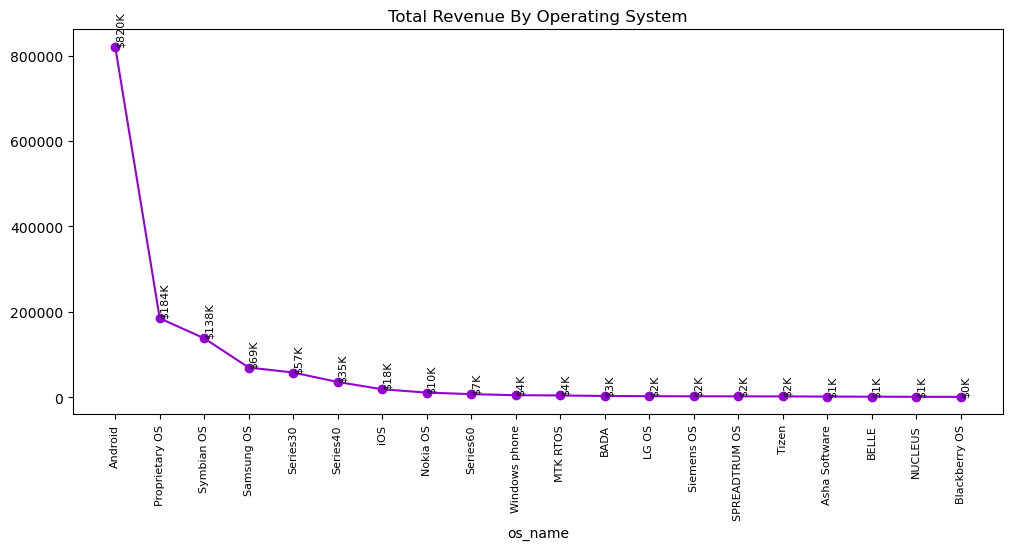

In [81]:
fig, ax = plt.subplots(figsize = (12,5))

ax = top_os_rev.plot(kind='line', color = colors, marker = 'o')

for i, val in enumerate(top_os_rev):
    plt.text(i, val, f'${val/1000:,.0f}K', rotation = 90, fontsize = 8, ha = 'left', va = 'bottom')

# get the x-tick locations and labels
xticks_loc = list(range(len(top_os_rev.index)))
xticks_labels = top_os_rev.index

# set the x-tick locations and labels
plt.xticks(xticks_loc, xticks_labels, fontsize = 8, rotation='vertical')

plt.setp(ax.get_xticklabels(), rotation=90)
plt.title('Total Revenue By Operating System')
plt.show()

---

### Insight

From the summary of the total revenue by operating system, we can see that Android and Proprietary OS are the two major players in terms of revenue. This suggests that most customers prefer using smartphones with either Android or Proprietary OS, and it may be beneficial for us to focus on these two and some few other operating systems for our mobile devices. It is also important to note that Symbian OS and Samsung OS have a significant amount of revenue as well, so it may be worthwhile to consider offering mobile devices with these operating systems as well. Additionally, it is interesting to see that iOS has a relatively small amount of revenue (~$18K) compared to the other operating systems, indicating that there may be less demand for iOS devices among our customer base. 




### Recommendation

This interesting phenomenon may be something to investigate further to understand why iOS devices are not as popular among our customers preferences.



---

In [82]:
# Revenue By Device Model

model_name_rev = df.groupby('model_name')['revenue_usd'].sum().sort_values(ascending = False)
top_model_name_rev = model_name_rev.head(20)
top_model_name_rev

model_name
GURU MUSIC II (SM-B310E)                 46702.29
GALAXY GRAND PRIME DUOS (SM-G532F DS)    21278.53
108 DUAL SIM (RM-944)                    20890.91
1280, 1282                               20098.08
105, 1050 (RM-908)                       19251.44
GALAXY J1 (SM-J110HDS)                   19214.51
105 DS (TA-1034)                         18043.76
GALAXY J2 (SM-J200H)                     17881.27
L25, FT42, W130, W69                     16941.29
SYMPHONY B12, D115                       15736.55
BL60, D54I                               14147.86
GALAXY J1 (SM-J100H DS)                  13118.55
GALAXY J2 PRIME DUOS (SM-G532G DS)       12703.60
105 (RM-1134)                            12377.89
V75                                      11413.69
GALAXY S DUOS II (GT-S7582)              11128.71
220                                      11105.51
215 DUAL SIM                             10714.02
216 DUAL SIM (RM-1187)                   10400.99
GALAXY J1 ACE DUOS (SM-J111F DS)       

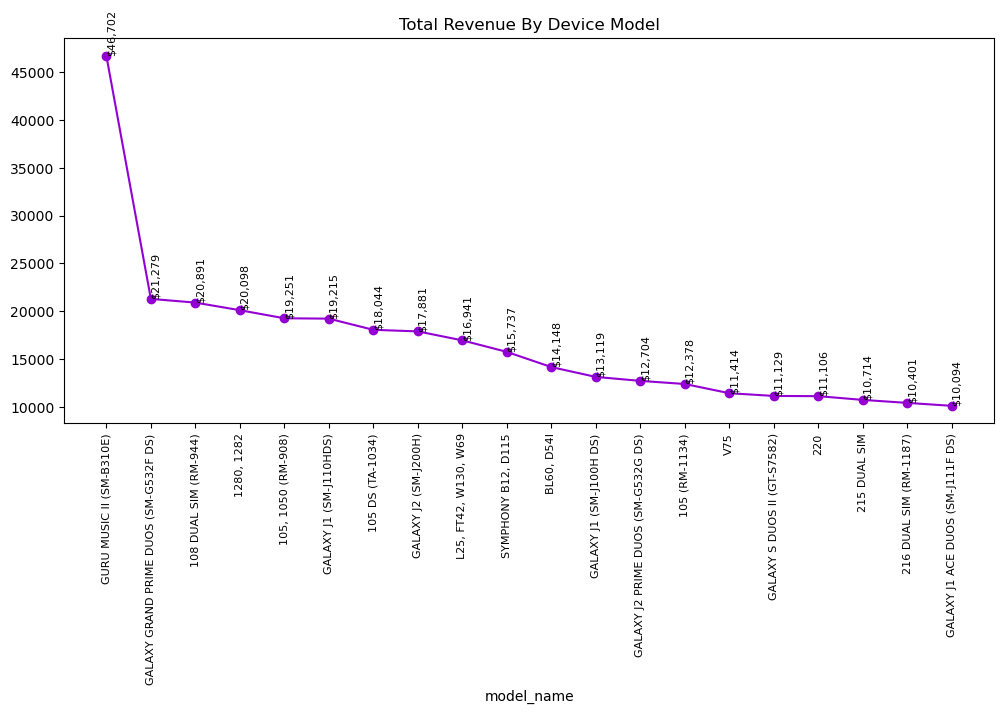

In [83]:
fig, ax = plt.subplots()

ax = top_model_name_rev.plot(kind='line', color = colors, marker = 'o')

for i, val in enumerate(top_model_name_rev):
    plt.text(i, val, f'${val:,.0f}', rotation = 90, fontsize = 8, ha = 'left', va = 'bottom')

# get the x-tick locations and labels
xticks_loc = list(range(len(top_model_name_rev.index)))
xticks_labels = top_model_name_rev.index

# set the x-tick locations and labels
plt.xticks(xticks_loc, xticks_labels, fontsize = 8, rotation='vertical')

plt.setp(ax.get_xticklabels(), rotation=90)
plt.title('Total Revenue By Device Model')
plt.show()

---

### Insight

Based on the summary of the total revenue by device models, it appears that the top-performing models are mostly low-end devices targeted towards the budget-conscious customers. This could then suggest that the target market for us may be primarily price-sensitivity, and there may be an opportunity to expand the offerings of budget-friendly devices. 



### Recommendation

It may be worthwhile to analyze the features and specifications of these top-performing models and see if there are any commonalities or patterns that can inform future product development and marketing strategies.


---

In [91]:
# Perform linear regression using OLS (ordinary least squares) method
X = df['gender_binary']
y = df['revenue_usd']
X = sm.add_constant(X)  # add a constant term to the model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary statistics
print(results.summary())

# Get the r-square value
print("R-Square:", results.rsquared)

# Get the p-value
print("P-Value:", results.f_pvalue)

# Get the intercept and coefficient values
intercept = results.params[0]
coefficient = results.params[1]
print("Intercept:", intercept)
print("Coefficient:", coefficient)



                            OLS Regression Results                            
Dep. Variable:            revenue_usd   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.101
Date:                Fri, 12 May 2023   Prob (F-statistic):             0.0429
Time:                        09:39:21   Log-Likelihood:            -3.7748e+05
No. Observations:              117314   AIC:                         7.550e+05
Df Residuals:                  117312   BIC:                         7.550e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.5131      0.048    240.868

In [92]:
df.head(5)

,msisdn,gender,year_of_birth,system_status,mobile_type,value_segment,generation,cluster_label,imei_tac,brand_name,model_name,os_name,os_vendor,week_number,revenue_usd,revenue_per_customer,gender_binary
0,4f5216988c44ec0a96a82a04f28b49fa,Male,1988.0,ACTIVE,Prepaid,Tier_3,Millennials,0,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,34,8.39,12.375656,1
1,4f5216988c44ec0a96a82a04f28b49fa,Male,1988.0,ACTIVE,Prepaid,Tier_3,Millennials,0,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,24,4.57,12.235951,1
2,4f5216988c44ec0a96a82a04f28b49fa,Male,1988.0,ACTIVE,Prepaid,Tier_3,Millennials,0,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,30,19.58,11.297877,1
3,4f5216988c44ec0a96a82a04f28b49fa,Male,1988.0,ACTIVE,Prepaid,Tier_3,Millennials,0,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,31,9.27,11.892329,1
4,4f5216988c44ec0a96a82a04f28b49fa,Male,1988.0,ACTIVE,Prepaid,Tier_3,Millennials,0,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,33,13.29,12.045107,1


In [93]:
# Perform linear regression using OLS (ordinary least squares) method
X = df[['gender_binary','year_of_birth']]
y = df['revenue_usd']
X = sm.add_constant(X)  # add a constant term to the model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary statistics
print(results.summary())

# Get the r-square value
print("R-Square:", results.rsquared)

# Get the p-value
print("P-Value:", results.f_pvalue)

# Get the intercept and coefficient values
intercept = results.params[0]
coefficient = results.params[1]
print("Intercept:", intercept)
print("Coefficient:", coefficient)

                            OLS Regression Results                            
Dep. Variable:            revenue_usd   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     8.878
Date:                Fri, 12 May 2023   Prob (F-statistic):           0.000139
Time:                        09:40:39   Log-Likelihood:            -3.7748e+05
No. Observations:              117314   AIC:                         7.550e+05
Df Residuals:                  117311   BIC:                         7.550e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -2.2780      3.732     -0.610

---

### Insight

The intercept of 9.52 indicates the baseline revenue that can be expected when both gender and week number are zero. The coefficient for gender of 0.04 suggests that for each increase in gender binary (which is impossible) value by one, the revenue is predicted to increase by 0.04 units, assuming week number remains constant. The coefficient for week number of 0.07 suggests that for each increase in week number by one, the revenue is predicted to increase by 0.07 units, assuming gender binary remains constant.




### Recommendation

Based on these coefficients, it appears that both gender and week number have a positive impact on revenue. However, it's important to note that correlation does not always imply causation, and there may be other factors that could affect revenue as well. Therefore, it's important to further investigate the relationship between these features and revenue before making any definitive conclusions or recommendations.




---

In [94]:
# Correlation

corr_matrix = df.corr()
corr_matrix

/var/folders/hk/s0hjzjs5759flr4gkndn94xr0000gn/T/ipykernel_54302/2108718535.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,year_of_birth,cluster_label,week_number,revenue_usd,revenue_per_customer,gender_binary
year_of_birth,1.000000,-0.324971,0.010760,0.011032,0.008137,0.043006
cluster_label,-0.324971,1.000000,-0.002325,-0.002946,-0.001708,-0.028053
week_number,0.010760,-0.002325,1.000000,0.046677,0.517086,-0.000017
revenue_usd,0.011032,-0.002946,0.046677,1.000000,0.090269,0.005912
revenue_per_customer,0.008137,-0.001708,0.517086,0.090269,1.000000,0.000395
gender_binary,0.043006,-0.028053,-0.000017,0.005912,0.000395,1.000000


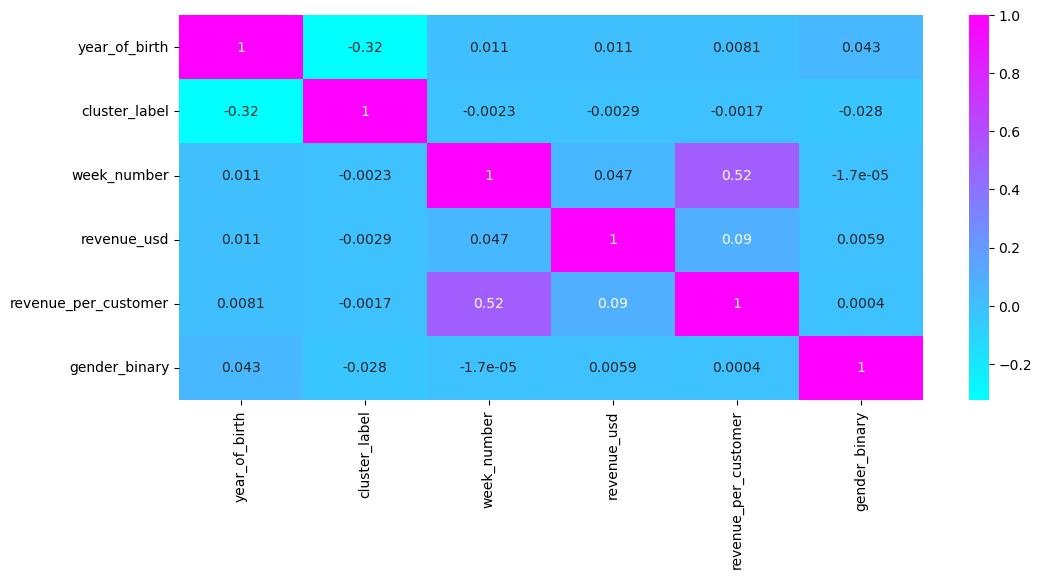

In [95]:
sns.heatmap(corr_matrix, annot = True,cmap = 'cool')

plt.show()

---

### Insight

From the results above, we can see that:

1. There is a weak positive correlation between year_of_birth and gender_binary, which suggests that younger customers may be more likely to be male than female (or vice versa).

2. There is a moderate negative correlation between year_of_birth and cluster_label, which suggests that customers who are younger tend to be clustered differently than those who are older.

3. There is a weak positive correlation between week_number and revenue_usd, which suggests that revenue tends to increase slightly as the weeks progress.

4. The correlation between cluster_label and revenue_usd is weak, indicating that there is no strong relationship between customer clustering and revenue.

5. Finally, the correlation between gender_binary and revenue_usd is weak, indicating that there is no strong relationship between gender and revenue.



### Recommendation

Based on these results, it may be useful to explore further the relationship between year_of_birth and gender_binary and investigate why younger customers are more likely to be male (or vice versa). Additionally, further analysis could be conducted to identify why younger customers are clustered differently than older customers, as this could have implications for marketing and product offerings. 

Finally, while there is no strong correlation between any of the features and revenue, further analysis could still be conducted to identify other factors that may impact revenue.








---

# End 